<a href="https://colab.research.google.com/github/TimurTaepov/drafts/blob/main/(1)%201%20Assignment%20Timur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

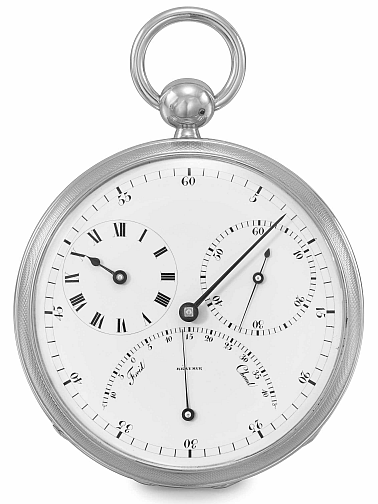

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
A = cv2.imread("watch.pgm", cv2.IMREAD_GRAYSCALE)
cv2_imshow(A)

### The formula for the intensity of the (i, j)-th pixel of the target image, that is, express a2i,j in terms of the source image intensities a1k,l is looks like this:
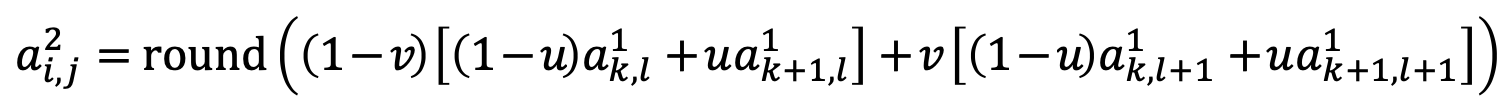

### Suppose we scale a given image by a scale factor of c = 0.25, using bilinear interpolation

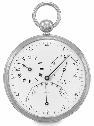

In [ ]:
A1 = cv2.imread("watch.pgm", cv2.IMREAD_GRAYSCALE)
# cv2_imshow(A1)


M1 = A1.shape[0]
N1 = A1.shape[1]


c = 0.25 # Set a scale factor of c = 0.25
M2 = round(c * M1)
N2 = round(c * N1)
A2 = np.zeros((M2,N2))

# Use a bilinear interpolation
for i in range(0,M2):
  for j in range(0,N2):
    x = (i + 0.5) * M1/M2     
    y = (j + 0.5) * N1/N2     
    k = round(x) - 1
    l = round(y) - 1
    k = min( max( k, 0 ), M1-2 )      
    l = min( max( l, 0 ), N1-2 )      
    u = x - k - 0.5
    v = y - l - 0.5
    A2[i,j] = round( (1-v) * ( (1-u)*A1[k,l] + u*A1[k+1,l] ) + v * ( (1-u)*A1[k,l+1] + u*A1[k+1,l+1] ) )

cv2_imshow(A2)

# Then on slide 14 we can find a zoom out algorithm.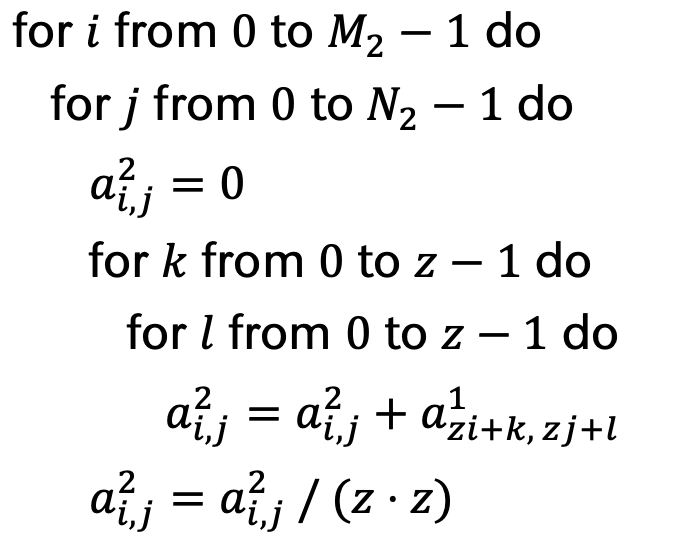

### Let's use this algorithm for zooming out by a factor of z = 1/c = 4.

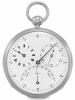

In [ ]:
A1 = cv2.imread("watch.pgm", cv2.IMREAD_GRAYSCALE)
# cv2_imshow(A1)


M1 = A1.shape[0]
N1 = A1.shape[1]


z = 5
M2 = np.floor(M1/z).astype(int)
N2 = np.floor(N1/z).astype(int)
A2 = np.zeros((M2,N2))


for i in range(0,M2):
  for j in range(0,N2):
    for k in range(0,z):
      for l in range(0,z):
        A2[i,j] += A1[z*i+k,z*j+l]
A2 /= pow(z,2)

cv2_imshow(A2)



## 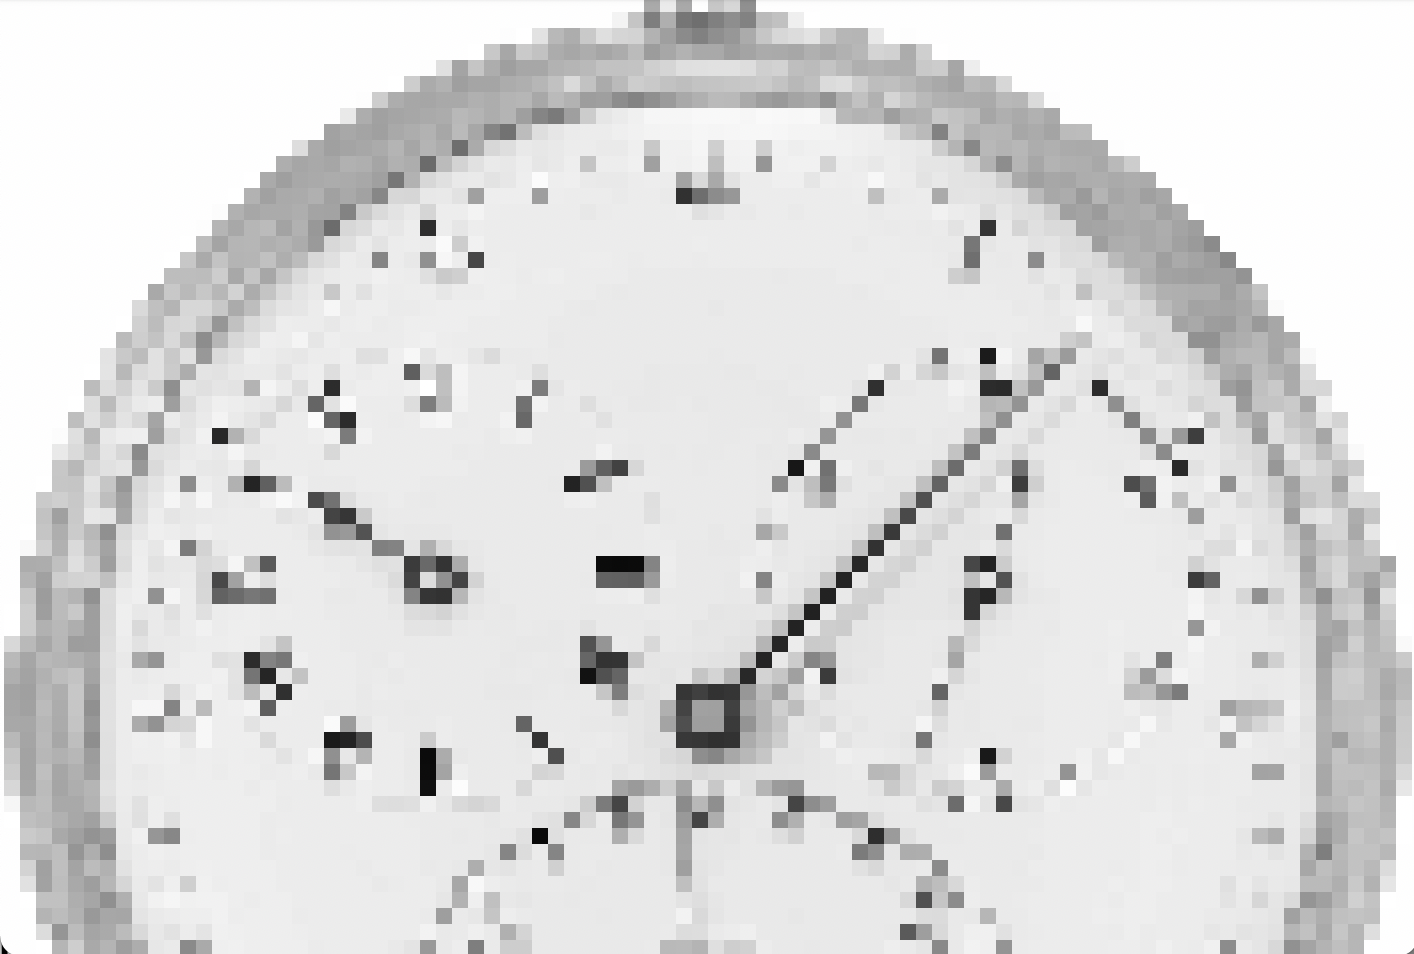In general, bilinear interpolation approach should give us an output with a smoother picture than nearest neighbour interpolation approach. However in our case we can see the opposite situation.
Lower picture "Nearest neighbour interpolation" | Upper picture "Bilinear interpolation"
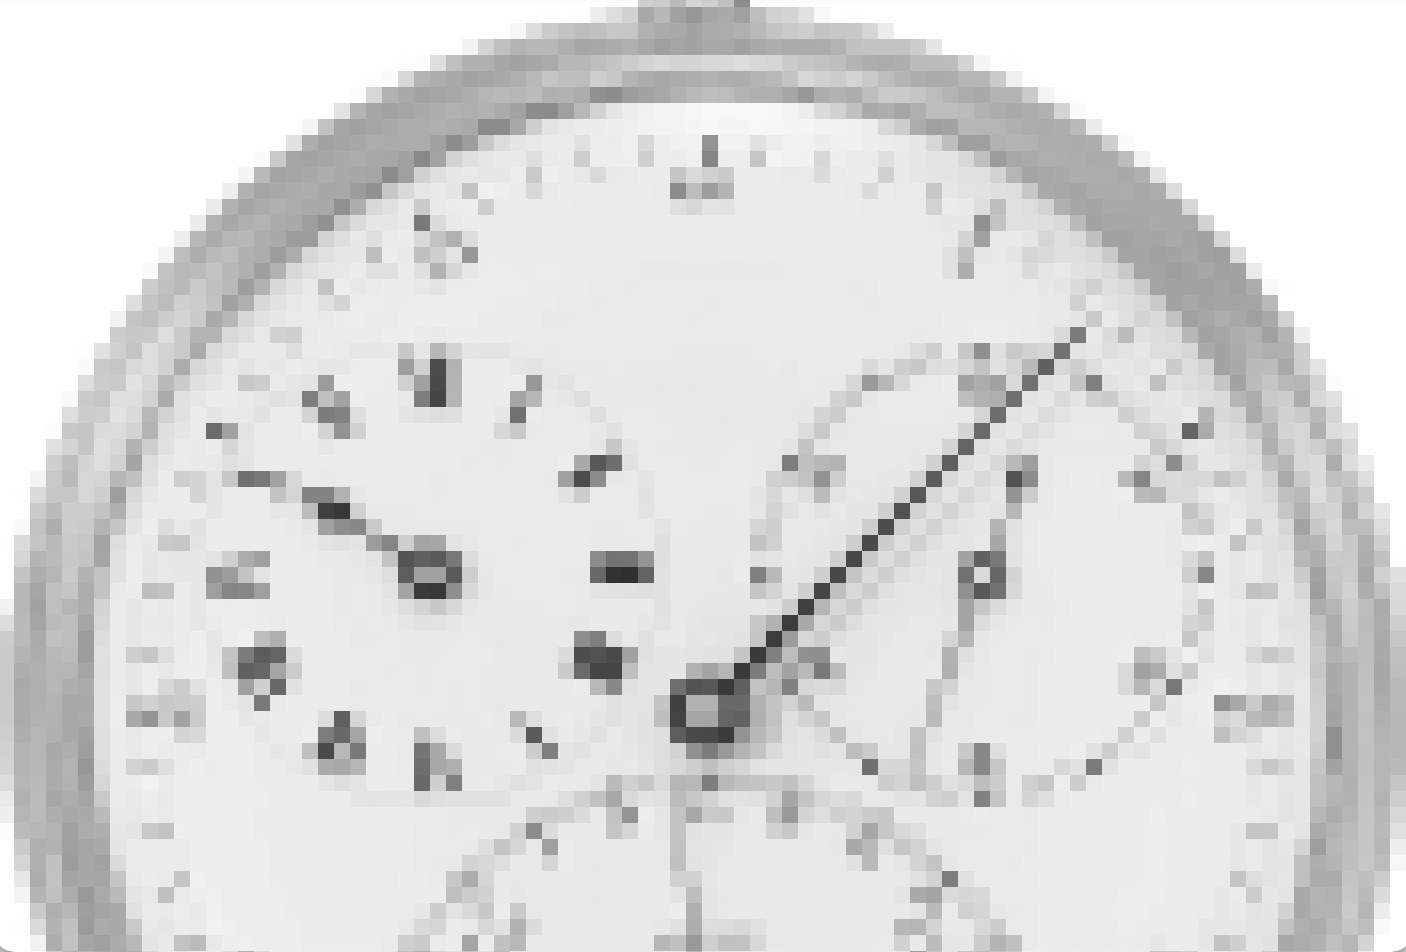

It seems to me that the use of bilinear interpolation in order to reduce the picture in this case leads to the predominance of extreme shades in the quadrants in which the point falls when decreasing. In some places we see almost black zones, in some places completely white. It all depends on the quadrant, however some quadrants that are completely black give us black pixels and in this case the bilinear interpolation weights do not help.

In turn, the nearest neighbor helps us much better with the reduction of the image, averaging the necessary areas and due to this the image is smoother.

 Paradoxically

### With c = 0.2 or z = 5 we are having the same situation

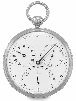

In [ ]:
A1 = cv2.imread("watch.pgm", cv2.IMREAD_GRAYSCALE)
# cv2_imshow(A1)


M1 = A1.shape[0]
N1 = A1.shape[1]


c = 0.2 # Set a scale factor of c = 0.25
M2 = round(c * M1)
N2 = round(c * N1)
A2 = np.zeros((M2,N2))

# Use a bilinear interpolation
for i in range(0,M2):
  for j in range(0,N2):
    x = (i + 0.5) * M1/M2     
    y = (j + 0.5) * N1/N2     
    k = round(x) - 1
    l = round(y) - 1
    k = min( max( k, 0 ), M1-2 )      
    l = min( max( l, 0 ), N1-2 )      
    u = x - k - 0.5
    v = y - l - 0.5
    A2[i,j] = round( (1-v) * ( (1-u)*A1[k,l] + u*A1[k+1,l] ) + v * ( (1-u)*A1[k,l+1] + u*A1[k+1,l+1] ) )

cv2_imshow(A2)

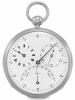

In [ ]:
A1 = cv2.imread("watch.pgm", cv2.IMREAD_GRAYSCALE)
# cv2_imshow(A1)


M1 = A1.shape[0]
N1 = A1.shape[1]


z = 5
M2 = np.floor(M1/z).astype(int)
N2 = np.floor(N1/z).astype(int)
A2 = np.zeros((M2,N2))


for i in range(0,M2):
  for j in range(0,N2):
    for k in range(0,z):
      for l in range(0,z):
        A2[i,j] += A1[z*i+k,z*j+l]
A2 /= pow(z,2)

cv2_imshow(A2)

